In [2]:
#!/usr/bin/env python
# coding: utf-8
import numpy as np
time_Y = [str(l.split()[0]) for l in open("./splittime-lag-regular-cpa-and-halo-CPA.txt")]
time_M = [str(l.split()[1]) for l in open("./splittime-lag-regular-cpa-and-halo-CPA.txt")]
time_YM = [str(l.split()[2]) for l in open("./splittime-lag-regular-cpa-and-halo-CPA.txt")]
time_D = [str(l.split()[3]) for l in open("./splittime-lag-regular-cpa-and-halo-CPA.txt")]
time_YMD = [str(l.split()[4]) for l in open("./splittime-lag-regular-cpa-and-halo-CPA.txt")]
data_cpa = [str(l.split()[5]) for l in open("./splittime-lag-regular-cpa-and-halo-CPA.txt")]
data_width = [str(l.split()[6]) for l in open("./splittime-lag-regular-cpa-and-halo-CPA.txt")]

timeY = np.array(time_Y)
timeM = np.array(time_M)
timeYM = np.array(time_YM)
timeD = np.array(time_D)
timeYMD = np.array(time_YMD)
dataCPA = np.array(data_cpa)
datawidth = np.array(data_width)

#1change to float
float_cpa_all = []
for num in data_cpa :
    float_cpa_all.append(float(num))
#2change to latitude    
latitude_all =[]
for num in float_cpa_all :
    if  0 < num < 90 or 90 < num < 180:
        latitude = 90. - num
        latitude_all.append(latitude)
    if 180 < num < 270 or 270 < num <360:
        latitude = num- 270.
        latitude_all.append(latitude)
    if num == 0.:
        latitude = 90.
        latitude_all.append(latitude)
    if num == 90.:
        latitude = 0.
        latitude_all.append(latitude)
    if num == 180.:
        latitude= -90.
        latitude_all.append(latitude)
    if num == 270.:
        latitude = 0.
        latitude_all.append(latitude)
write_fil= open("./step3-regular-CPA-to-latitudes.txt",'w')
for i in range(0,len(timeY)):
    write_fil.write(str(timeY[i]).center(8)+" "+str(timeM[i]).center(4)+" "+str(timeYM[i]).center(10)+" "+str(timeD[i]).center(4)+" "+str(timeYMD[i]).center(14)+" "+str(dataCPA[i]).center(8)+str(datawidth[i]).center(10)+str(latitude_all[i]).center(8)+" " +'\n')


数据时间始-末: 1996 01 11 - 2020 12 17
总CME的个数 11954
北极上CME的个数 15 占regularCME总数的百分比是: 0.1255
(60,90]CME的个数 851 占regularCME总数的百分比是: 7.119
(50,60]CME的个数 402 占regularCME总数的百分比是: 3.3629
(40,50]CME的个数 553 占regularCME总数的百分比是: 4.6261
(10,40]CME的个数 2847 占regularCME总数的百分比是: 23.8163
(0,10]CME的个数 1253 占regularCME总数的百分比是: 10.4818
赤道上CME的个数 130 占regularCME总数的百分比是: 1.0875
(-10,0)CME的个数 1167 占regularCME总数的百分比是: 9.7624
(-40,-10]CME的个数 2901 占regularCME总数的百分比是: 24.268
(-50,-40]CME的个数 590 占regularCME总数的百分比是: 4.9356
(-60,-50]CME的个数 401 占regularCME总数的百分比是: 3.3545
(-90,-60]CME的个数 828 占regularCME总数的百分比是: 6.9266
南极regulaCME的个数 16 占regularCME总数的百分比是: 0.1338
所有regularCME的个数 11954


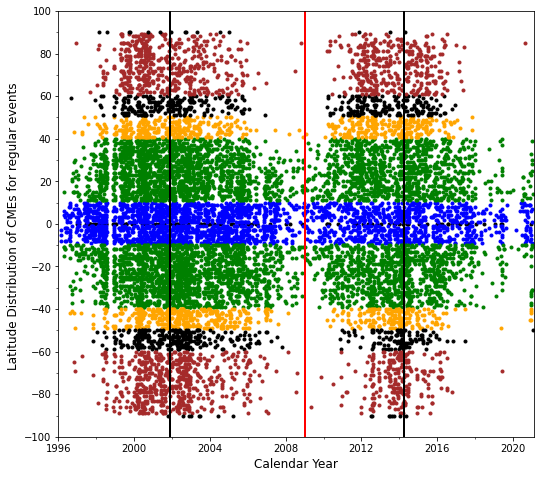

In [2]:
import matplotlib.pyplot as plt
import pylab
from matplotlib import *
from mpl_toolkits.axes_grid1 import host_subplot#lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap
#from astroML.plotting import setup_text_plots
import matplotlib.ticker as ticker
timeY = [str(l.split()[0]) for l in open("step3-regular-CPA-to-latitudes.txt")]
timeM = [str(l.split()[1]) for l in open("step3-regular-CPA-to-latitudes.txt")]
timeD = [str(l.split()[3]) for l in open("step3-regular-CPA-to-latitudes.txt")]
time = [float(l.split()[-4]) for l in open("step3-regular-CPA-to-latitudes.txt")]
Data = [float(l.split()[-1]) for l in open("step3-regular-CPA-to-latitudes.txt")]
lati0 = []
Nlati010 = []
Nlati1040 = []
Nlati4050 = []
Nlati5060 = []
Nlati6090 = []
Nlati90 = []
time0 = []
Ntime010 = []
Ntime1040 = []
Ntime4050 = []
Ntime5060 = []
Ntime6090 = []
Ntime90 = []
#南半球
Slati010 = []
Slati1040 = []
Slati4050 = []
Slati5060 = []
Slati6090 = []
Slati90 = []
Stime010 = []
Stime1040 = []
Stime4050 = []
Stime5060 = []
Stime6090 = []
Stime90 = []

for i in range (0,len(Data)):
    if Data[i] == 0:
        lati0.append(Data[i])
        time0.append(time[i])
    if 0<Data[i]<=10:
        Nlati010.append(Data[i])
        Ntime010.append(time[i])
    if 10<Data[i]<=40:
        Nlati1040.append(Data[i])
        Ntime1040.append(time[i])
    if 40<Data[i]<=50:
        Nlati4050.append(Data[i])
        Ntime4050.append(time[i])
    if 50<Data[i]<=60:
        Nlati5060.append(Data[i])
        Ntime5060.append(time[i])
    if 60<Data[i]<90:
        Nlati6090.append(Data[i])
        Ntime6090.append(time[i])
    if Data[i]==90:
        Nlati90.append(Data[i])
        Ntime90.append(time[i])
#南半球
    if -10<Data[i]<0:
        Slati010.append(Data[i])
        Stime010.append(time[i])
    if -40<Data[i]<=-10:
        Slati1040.append(Data[i])
        Stime1040.append(time[i])
    if -50<Data[i]<=-40:
        Slati4050.append(Data[i])
        Stime4050.append(time[i])
    if -60<Data[i]<=-50:
        Slati5060.append(Data[i])
        Stime5060.append(time[i])
    if -90<Data[i]<=-60:
        Slati6090.append(Data[i])
        Stime6090.append(time[i])
    if Data[i]==-90:
        Slati90.append(Data[i])
        Stime90.append(time[i])


fig = plt.figure(figsize = (7.5,6.5))
plt.subplots_adjust(left=0.10, bottom=0.07, right=0.98, top=0.98, wspace=0.10, hspace=0.20)
ax1=plt.subplot(111)
ax1.set_ylabel("Latitude Distribution of CMEs for regular events ",fontsize = 12)
ax1.set_xlabel("Calendar Year",fontsize = 12)
ax1.scatter(time0,lati0,c = 'k', marker=".")
ax1.scatter(Ntime010,Nlati010,c = 'b', marker=".")
ax1.scatter(Stime010,Slati010,c = 'b', marker=".")
ax1.scatter(Ntime1040,Nlati1040,c = 'g', marker=".")
ax1.scatter(Stime1040,Slati1040,c = 'g', marker=".")
ax1.scatter(Ntime4050,Nlati4050,c = 'orange', marker=".")
ax1.scatter(Stime4050,Slati4050,c = 'orange', marker=".")
ax1.scatter(Ntime5060,Nlati5060,c = 'k', marker=".")
ax1.scatter(Stime5060,Slati5060,c = 'k', marker=".")
ax1.scatter(Ntime6090,Nlati6090,c = 'brown', marker=".")
ax1.scatter(Stime6090,Slati6090,c = 'brown', marker=".")
ax1.scatter(Ntime90,Nlati90,c = 'k', marker=".")
ax1.scatter(Stime90,Slati90,c = 'k', marker=".")
#ax1.plot([1996.667,1996.667],[-120.0,120.0],"gray",lw=2.0,linestyle="-")
ax1.plot([2001.917,2001.917],[-120.0,120.0],"black",lw=2.0,linestyle="-")
ax1.plot([2009.000,2009.000],[-120.0,120.0],"red",lw=2.0,linestyle="-")
ax1.plot([2014.25,2014.25],[-120.0,120.0],"black",lw=2.0,linestyle="-")
ax1.set_ylim([-100,100])
ax1.set_xlim([1996.0,2021.1])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(10))

#纬度带具体发生CME的个数
print("数据时间始-末:",timeY[0],timeM[0],timeD[0],"-",timeY[-1],timeM[-1],timeD[-1])
print("总CME的个数",len(Data))
print("北极上CME的个数",len(Nlati90),"占regularCME总数的百分比是:",round(float(len(Nlati90)/len(Data))*100,4))
print("(60,90]CME的个数",len(Nlati6090),"占regularCME总数的百分比是:",round(float(len(Nlati6090)/len(Data))*100,4))
print("(50,60]CME的个数",len(Nlati5060),"占regularCME总数的百分比是:",round(float(len(Nlati5060)/len(Data))*100,4))
print("(40,50]CME的个数",len(Nlati4050),"占regularCME总数的百分比是:",round(float(len(Nlati4050)/len(Data))*100,4))
print("(10,40]CME的个数",len(Nlati1040),"占regularCME总数的百分比是:",round(float(len(Nlati1040)/len(Data))*100,4))
print("(0,10]CME的个数",len(Nlati010),"占regularCME总数的百分比是:",round(float(len(Nlati010)/len(Data))*100,4))
print("赤道上CME的个数",len(lati0),"占regularCME总数的百分比是:",round(float(len(lati0)/len(Data))*100,4))
#南半球

print("(-10,0)CME的个数",len(Slati010),"占regularCME总数的百分比是:",round(float(len(Slati010)/len(Data))*100,4))
print("(-40,-10]CME的个数",len(Slati1040),"占regularCME总数的百分比是:",round(float(len(Slati1040)/len(Data))*100,4))
print("(-50,-40]CME的个数",len(Slati4050),"占regularCME总数的百分比是:",round(float(len(Slati4050)/len(Data))*100,4))
print("(-60,-50]CME的个数",len(Slati5060),"占regularCME总数的百分比是:",round(float(len(Slati5060)/len(Data))*100,4))
print("(-90,-60]CME的个数",len(Slati6090),"占regularCME总数的百分比是:",round(float(len(Slati6090)/len(Data))*100,4))
print("南极regulaCME的个数",len(Slati90),"占regularCME总数的百分比是:",round(float(len(Slati90)/len(Data))*100,4))

print("所有regularCME的个数",len(Nlati90)+len(Nlati6090)+len(Nlati5060)+len(Nlati4050)+len(Nlati1040)+len(Nlati010)+len(lati0)+len(Slati90)+len(Slati010)+len(Slati1040)+len(Slati4050)+len(Slati5060)+len(Slati6090))
foo_fig = plt.gcf() # 'get current figure'
foo_fig.savefig('step3-regularlatitudes-plot.eps', format='eps', dpi=1000)
foo_fig.savefig('step3-regularlatitudes-plot.png', format='png', dpi=1000)
plt.show()



In [6]:
#!/usr/bin/env python
# coding: utf-8
import numpy as np
time_Y = [str(l.split()[0]) for l in open("./splittime-lag-specific-cpa-and-halo-CPA.txt")]
time_M = [str(l.split()[1]) for l in open("./splittime-lag-specific-cpa-and-halo-CPA.txt")]
time_YM = [str(l.split()[2]) for l in open("./splittime-lag-specific-cpa-and-halo-CPA.txt")]
time_D = [str(l.split()[3]) for l in open("./splittime-lag-specific-cpa-and-halo-CPA.txt")]
time_YMD = [str(l.split()[4]) for l in open("./splittime-lag-specific-cpa-and-halo-CPA.txt")]
data_cpa = [str(l.split()[5]) for l in open("./splittime-lag-specific-cpa-and-halo-CPA.txt")]
data_width = [str(l.split()[6]) for l in open("./splittime-lag-specific-cpa-and-halo-CPA.txt")]

timeY = np.array(time_Y)
timeM = np.array(time_M)
timeYM = np.array(time_YM)
timeD = np.array(time_D)
timeYMD = np.array(time_YMD)
dataCPA = np.array(data_cpa)
datawidth = np.array(data_width)

#1change to float
float_cpa_all = []
for num in data_cpa :
    float_cpa_all.append(float(num))
#2change to latitude    
latitude_all =[]
for num in float_cpa_all :
    if  0 < num < 90 or 90 < num < 180:
        latitude = 90. - num
        latitude_all.append(latitude)
    if 180 < num < 270 or 270 < num <360:
        latitude = num- 270.
        latitude_all.append(latitude)
    if num == 0.:
        latitude = 90.
        latitude_all.append(latitude)
    if num == 90.:
        latitude = 0.
        latitude_all.append(latitude)
    if num == 180.:
        latitude= -90.
        latitude_all.append(latitude)
    if num == 270.:
        latitude = 0.
        latitude_all.append(latitude)
write_fil= open("./step3-specific-CPA-to-latitudes.txt",'w')
for i in range(0,len(timeY)):
    write_fil.write(str(timeY[i]).center(8)+" "+str(timeM[i]).center(4)+" "+str(timeYM[i]).center(10)+" "+str(timeD[i]).center(4)+" "+str(timeYMD[i]).center(14)+" "+str(dataCPA[i]).center(8)+str(datawidth[i]).center(10)+str(latitude_all[i]).center(8)+" " +'\n')


数据时间始-末: 1996 01 22 - 2020 12 30
总CME的个数 18093
北极上CME的个数 33 占specificCME总数的百分比是: 0.1824
(60,90]CME的个数 1793 占specificCME总数的百分比是: 9.9099
(50,60]CME的个数 667 占specificCME总数的百分比是: 3.6865
(40,50]CME的个数 782 占specificCME总数的百分比是: 4.3221
(10,40]CME的个数 4064 占specificCME总数的百分比是: 22.4617
(0,10]CME的个数 1811 占specificCME总数的百分比是: 10.0094
赤道上CME的个数 174 占specificCME总数的百分比是: 0.9617
(-10,0)CME的个数 1583 占specificCME总数的百分比是: 8.7492
(-40,-10]CME的个数 4583 占specificCME总数的百分比是: 25.3302
(-50,-40]CME的个数 766 占specificCME总数的百分比是: 4.2337
(-60,-50]CME的个数 535 占specificCME总数的百分比是: 2.9569
(-90,-60]CME的个数 1282 占specificCME总数的百分比是: 7.0856
南极specificCME的个数 20 占specificCME总数的百分比是: 0.1105
所有specificCME的个数 18093


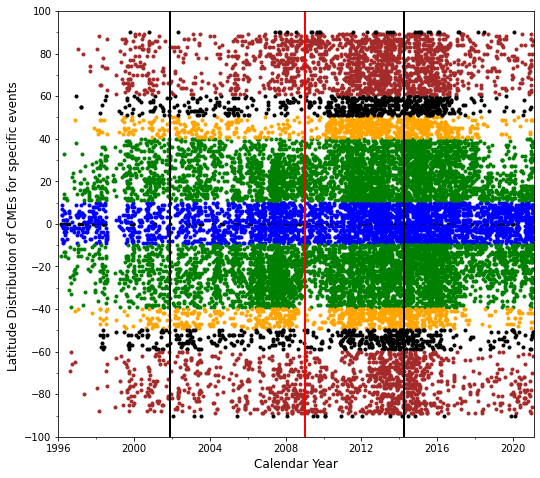

In [3]:
import matplotlib.pyplot as plt
import pylab
from matplotlib import *
from mpl_toolkits.axes_grid1 import host_subplot#lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap
#from astroML.plotting import setup_text_plots
import matplotlib.ticker as ticker
timeY = [str(l.split()[0]) for l in open("step3-specific-CPA-to-latitudes.txt")]
timeM = [str(l.split()[1]) for l in open("step3-specific-CPA-to-latitudes.txt")]
timeD = [str(l.split()[3]) for l in open("step3-specific-CPA-to-latitudes.txt")]
time = [float(l.split()[-4]) for l in open("step3-specific-CPA-to-latitudes.txt")]
Data = [float(l.split()[-1]) for l in open("step3-specific-CPA-to-latitudes.txt")]
lati0 = []
Nlati010 = []
Nlati1040 = []
Nlati4050 = []
Nlati5060 = []
Nlati6090 = []
Nlati90 = []
time0 = []
Ntime010 = []
Ntime1040 = []
Ntime4050 = []
Ntime5060 = []
Ntime6090 = []
Ntime90 = []
#南半球
Slati010 = []
Slati1040 = []
Slati4050 = []
Slati5060 = []
Slati6090 = []
Slati90 = []
Stime010 = []
Stime1040 = []
Stime4050 = []
Stime5060 = []
Stime6090 = []
Stime90 = []

for i in range (0,len(Data)):
    if Data[i] == 0:
        lati0.append(Data[i])
        time0.append(time[i])
    if 0<Data[i]<=10:
        Nlati010.append(Data[i])
        Ntime010.append(time[i])
    if 10<Data[i]<=40:
        Nlati1040.append(Data[i])
        Ntime1040.append(time[i])
    if 40<Data[i]<=50:
        Nlati4050.append(Data[i])
        Ntime4050.append(time[i])
    if 50<Data[i]<=60:
        Nlati5060.append(Data[i])
        Ntime5060.append(time[i])
    if 60<Data[i]<90:
        Nlati6090.append(Data[i])
        Ntime6090.append(time[i])
    if Data[i]==90:
        Nlati90.append(Data[i])
        Ntime90.append(time[i])
#南半球
    if -10<Data[i]<0:
        Slati010.append(Data[i])
        Stime010.append(time[i])
    if -40<Data[i]<=-10:
        Slati1040.append(Data[i])
        Stime1040.append(time[i])
    if -50<Data[i]<=-40:
        Slati4050.append(Data[i])
        Stime4050.append(time[i])
    if -60<Data[i]<=-50:
        Slati5060.append(Data[i])
        Stime5060.append(time[i])
    if -90<Data[i]<=-60:
        Slati6090.append(Data[i])
        Stime6090.append(time[i])
    if Data[i]==-90:
        Slati90.append(Data[i])
        Stime90.append(time[i])


fig = plt.figure(figsize = (7.5,6.5))
plt.subplots_adjust(left=0.10, bottom=0.07, right=0.98, top=0.98, wspace=0.10, hspace=0.20)
ax1=plt.subplot(111)
ax1.set_ylabel("Latitude Distribution of CMEs for specific events ",fontsize = 12)
ax1.set_xlabel("Calendar Year",fontsize = 12)
ax1.scatter(time0,lati0,c = 'k', marker=".")
ax1.scatter(Ntime010,Nlati010,c = 'b', marker=".")
ax1.scatter(Stime010,Slati010,c = 'b', marker=".")
ax1.scatter(Ntime1040,Nlati1040,c = 'g', marker=".")
ax1.scatter(Stime1040,Slati1040,c = 'g', marker=".")
ax1.scatter(Ntime4050,Nlati4050,c = 'orange', marker=".")
ax1.scatter(Stime4050,Slati4050,c = 'orange', marker=".")
ax1.scatter(Ntime5060,Nlati5060,c = 'k', marker=".")
ax1.scatter(Stime5060,Slati5060,c = 'k', marker=".")
ax1.scatter(Ntime6090,Nlati6090,c = 'brown', marker=".")
ax1.scatter(Stime6090,Slati6090,c = 'brown', marker=".")
ax1.scatter(Ntime90,Nlati90,c = 'k', marker=".")
ax1.scatter(Stime90,Slati90,c = 'k', marker=".")
#ax1.plot([1996.667,1996.667],[-120.0,120.0],"gray",lw=2.0,linestyle="-")
ax1.plot([2001.917,2001.917],[-120.0,120.0],"black",lw=2.0,linestyle="-")
ax1.plot([2009.000,2009.000],[-120.0,120.0],"red",lw=2.0,linestyle="-")
ax1.plot([2014.25,2014.25],[-120.0,120.0],"black",lw=2.0,linestyle="-")
ax1.set_ylim([-100,100])
ax1.set_xlim([1996.0,2021.1])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(10))

#纬度带具体发生CME的个数
print("数据时间始-末:",timeY[0],timeM[0],timeD[0],"-",timeY[-1],timeM[-1],timeD[-1])
print("总CME的个数",len(Data))
print("北极上CME的个数",len(Nlati90),"占specificCME总数的百分比是:",round(float(len(Nlati90)/len(Data))*100,4))
print("(60,90]CME的个数",len(Nlati6090),"占specificCME总数的百分比是:",round(float(len(Nlati6090)/len(Data))*100,4))
print("(50,60]CME的个数",len(Nlati5060),"占specificCME总数的百分比是:",round(float(len(Nlati5060)/len(Data))*100,4))
print("(40,50]CME的个数",len(Nlati4050),"占specificCME总数的百分比是:",round(float(len(Nlati4050)/len(Data))*100,4))
print("(10,40]CME的个数",len(Nlati1040),"占specificCME总数的百分比是:",round(float(len(Nlati1040)/len(Data))*100,4))
print("(0,10]CME的个数",len(Nlati010),"占specificCME总数的百分比是:",round(float(len(Nlati010)/len(Data))*100,4))
print("赤道上CME的个数",len(lati0),"占specificCME总数的百分比是:",round(float(len(lati0)/len(Data))*100,4))
#南半球

print("(-10,0)CME的个数",len(Slati010),"占specificCME总数的百分比是:",round(float(len(Slati010)/len(Data))*100,4))
print("(-40,-10]CME的个数",len(Slati1040),"占specificCME总数的百分比是:",round(float(len(Slati1040)/len(Data))*100,4))
print("(-50,-40]CME的个数",len(Slati4050),"占specificCME总数的百分比是:",round(float(len(Slati4050)/len(Data))*100,4))
print("(-60,-50]CME的个数",len(Slati5060),"占specificCME总数的百分比是:",round(float(len(Slati5060)/len(Data))*100,4))
print("(-90,-60]CME的个数",len(Slati6090),"占specificCME总数的百分比是:",round(float(len(Slati6090)/len(Data))*100,4))
print("南极specificCME的个数",len(Slati90),"占specificCME总数的百分比是:",round(float(len(Slati90)/len(Data))*100,4))

print("所有specificCME的个数",len(Nlati90)+len(Nlati6090)+len(Nlati5060)+len(Nlati4050)+len(Nlati1040)+len(Nlati010)+len(lati0)+len(Slati90)+len(Slati010)+len(Slati1040)+len(Slati4050)+len(Slati5060)+len(Slati6090))
foo_fig = plt.gcf() # 'get current figure'
foo_fig.savefig('step3-specificlatitudes-plot.eps', format='eps', dpi=1000)
foo_fig.savefig('step3-specificlatitudes-plot.png', format='png', dpi=1000)
plt.show()

